<center>
    
## Aprendizaje No Supervisado DiploDatos
    Laura Alonso Alemany y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
 
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros... 

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

# 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [23]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [24]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [25]:
from sklearn.cluster import KMeans,MeanShift,DBSCAN
from sklearn import decomposition

# 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [26]:
#url='https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset'
#df=pd.read_csv(url)
df_completo=pd.read_csv('players_22.csv')
df_completo.head(4)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [27]:
df_completo.tail(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,2002-02-06,167,61,113040.0,NorthEast United FC,Indian Super League,1.0,SUB,13.0,NaN,2021-08-31,2025.0,159,India,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,217000.0,NaN,NaN,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,32,49,38,70,67,65,54,85,50,62,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,45+2,45+2,45+2,47,47,47,47,47,47+2,47+2,47+2,48+2,46+2,46+2,46+2,48+2,45+2,44+2,44+2,44+2,45+2,45+2,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [28]:
print(df_completo.columns)
print(len(df_completo.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [29]:
df = df_completo.copy()
df = df.drop(['player_url','dob','club_jersey_number','club_loaned_from','club_joined',
              'club_contract_valid_until','player_tags','player_traits',
              'work_rate','body_type','real_face','player_face_url',
              'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1)
print(df.columns)
print(len(df.columns), 'variables')

Index(['sofifa_id', 'short_name', 'long_name', 'player_positions', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'nationality_id', 'nationality_name', 'nation_team_id',
       'nation_position', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_sho

In [30]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [31]:
#n=10000
#df_n=df.loc[:n] #los primeros n
df_n=df[(df['overall']>70)] # mejores jugadores

skills_ratings = ['attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle',
       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
       'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')
df_skills=df_n[skills_ratings]

35 variables numéricas: skills/habilidades


In [32]:
df_skills.head(3) #Entrada, matriz de datos X

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN


In [33]:
df_skills.tail(3) #Entrada, matriz de datos X

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
4590,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,NaN
4591,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,NaN
4592,57,61,54,70,61,71,60,49,74,78,59,62,53,71,55,62,61,78,72,66,72,66,68,71,48,74,64,70,61,13,10,10,6,9,NaN


In [34]:
df_skills.isnull().sum()

attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength                    0
power_long_shots                  0
mentality_aggression              0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
mentality_composure               0
defending_marking_awareness       0
defending_standing_tackle   

Los jugadores que no son arqueros pueden tener goalkeeping_speed=NaN. A estos le asignamos goalkeeping_speed=0.

In [35]:
df_skills = df_skills.fillna(0)
df_skills.isnull().sum() #Entrada, matriz de datos X

attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
mentality_composure            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeepin

# 3.-Exploración de la base

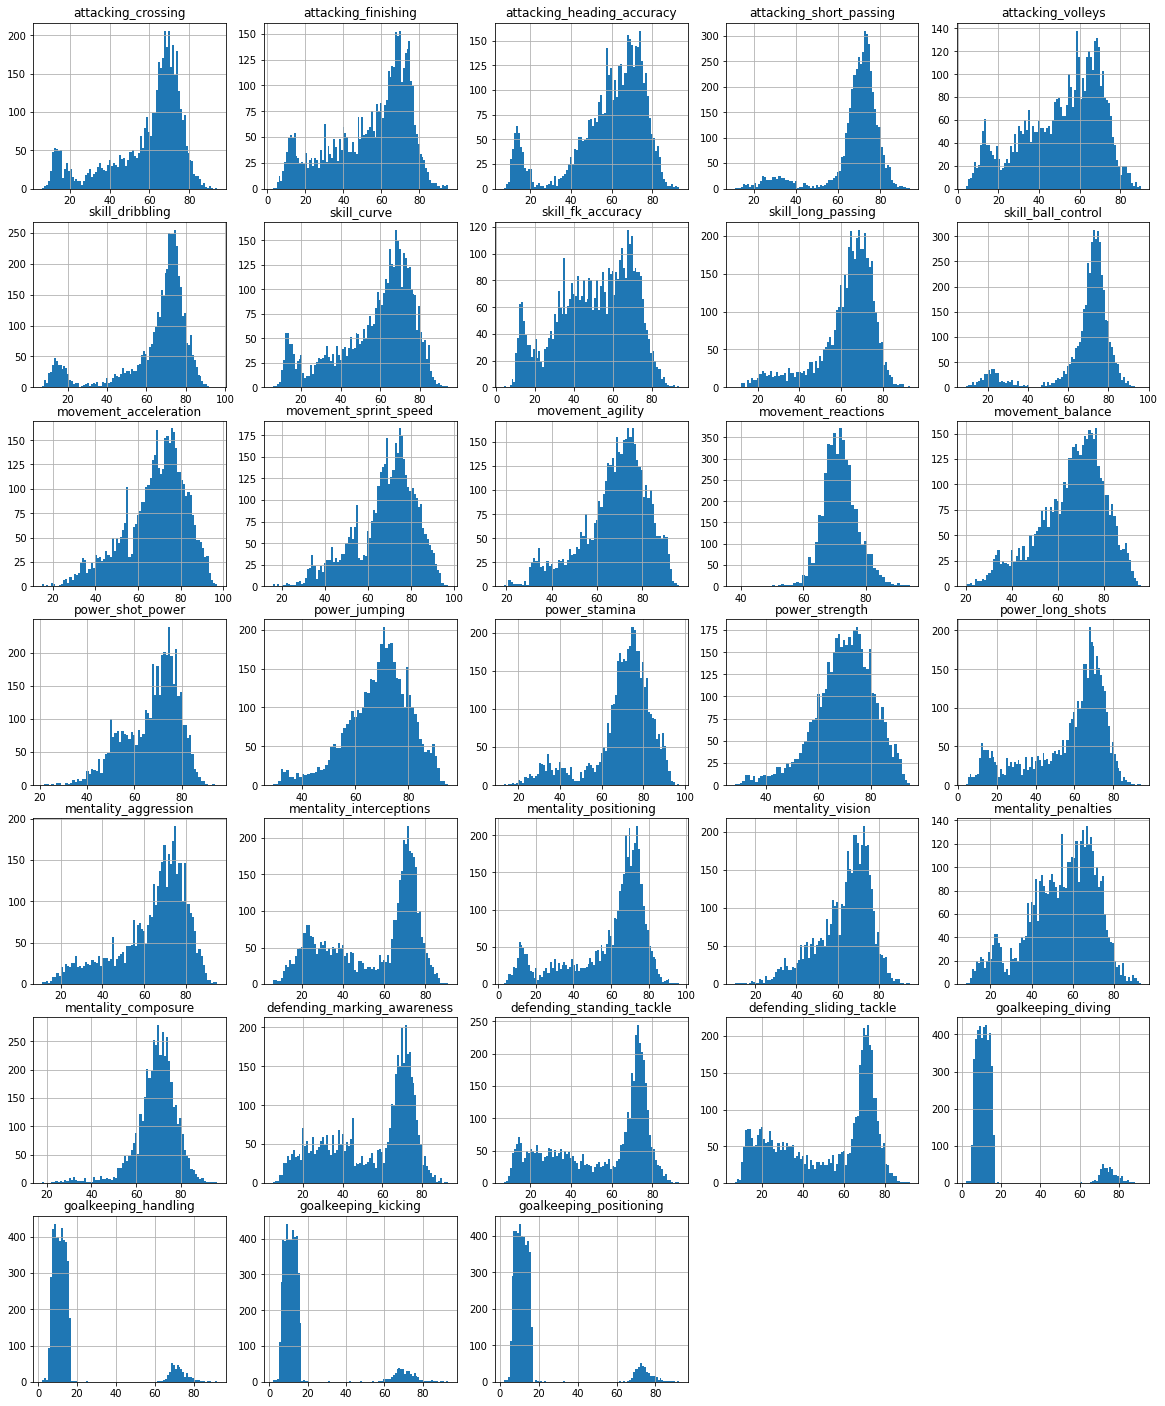

In [36]:
plt.figure(figsize=(20,25))
#nbins=89
i = 0
for feature in ('attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle',
       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
       'goalkeeping_positioning'):
  i += 1
  plt.subplot(7,5,i)
  nbins=df_n[feature].max()-df_n[feature].min()+1
  df_n[feature].hist(bins = nbins)  
  plt.title(feature)

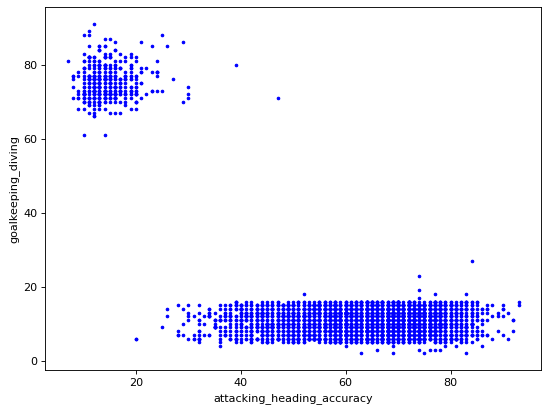

In [37]:
#data=[]
#bool_crack=df_n["overall"] > 70 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[29]

#Graficamos
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=5,c='blue',cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Lo que nos muestran estos gráficos es que al menos existen dos clases muy diferentes que se corresponden a los arqueros y a los jugadores de campo. Por lo tanto, sería interesante realizar el analisis y el clustering a las dos poblaciones separadamente.

In [38]:
df_n_arq=df_n[(df_n['goalkeeping_diving']>40)] # df con solo arqueros
df_n_cam=df_n[(df_n['goalkeeping_diving']<40)] # df sin arqueros
df_skills_arq = df_n_arq[skills_ratings]
df_skills_cam = df_n_cam[skills_ratings]
#df_skills_cam = df_skills_cam.fillna(0)

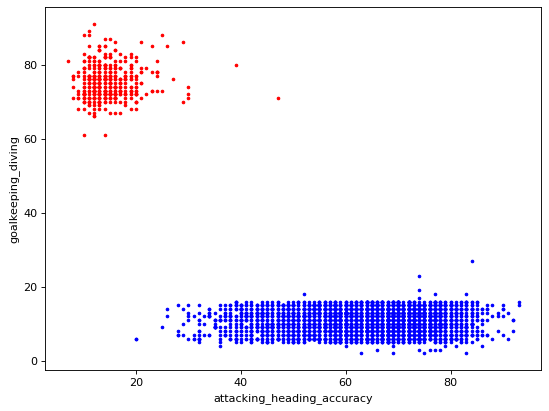

In [40]:
#data=[]
#bool_crack_arq=df_n_arq["overall"] > 70 #diferenciamos a los mejores jugadores
#bool_crack_cam=df_n_cam["overall"] > 70 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[29]

#Graficamos
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(df_skills_arq[skill_1], y=df_skills_arq[skill_2],s=5,c='red',cmap='jet')
plt.scatter(df_skills_cam[skill_1], y=df_skills_cam[skill_2],s=5,c='blue',cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

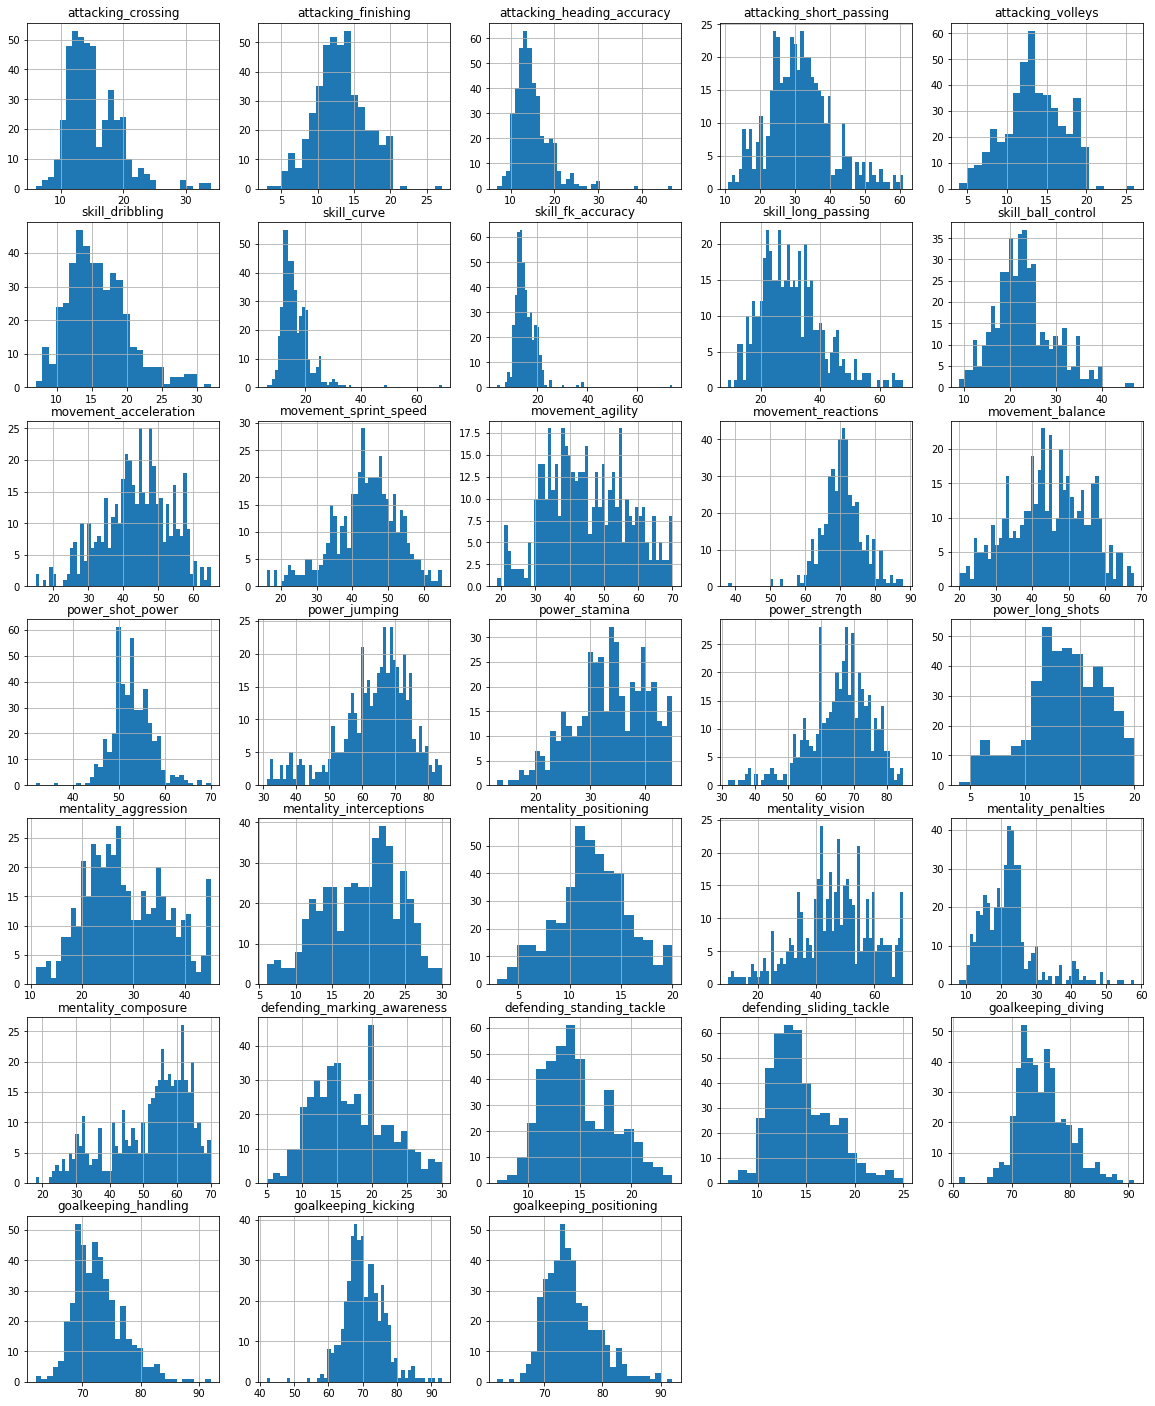

In [41]:
plt.figure(figsize=(20,25))
i = 0
for feature in ('attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle',
       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
       'goalkeeping_positioning'):
  i += 1
  plt.subplot(7,5,i)
  nbins=df_n_arq[feature].max()-df_n_arq[feature].min()+1
  df_n_arq[feature].hist(bins = nbins)  
  plt.title(feature)

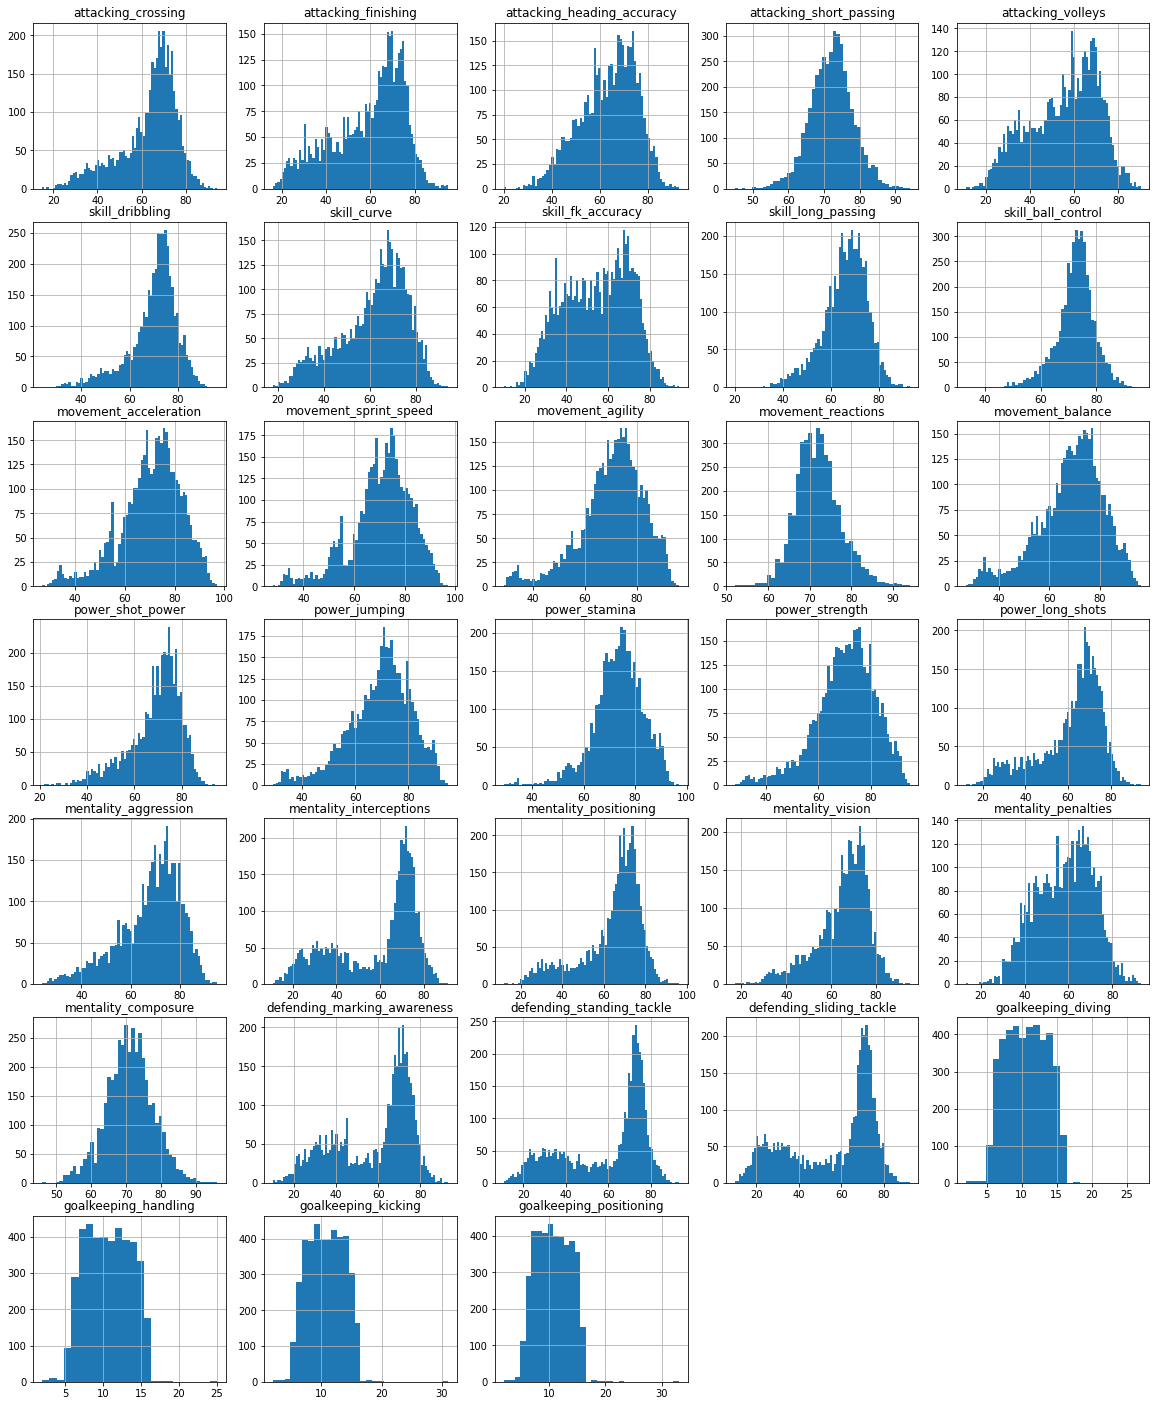

In [42]:
plt.figure(figsize=(20,25))
i = 0
for feature in ('attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle',
       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
       'goalkeeping_positioning'):
  i += 1
  plt.subplot(7,5,i)
  nbins=df_n_cam[feature].max()-df_n_cam[feature].min()+1
  df_n_cam[feature].hist(bins = nbins)  
  plt.title(feature)

# 4.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


## 4.1-Clustering-con-Kmeans - DF completo



In [43]:
# Número de clusters buscado
n_clust = 4
km = KMeans(n_clusters=n_clust).fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  11553599.174627902


In [44]:
df_clusters = df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
#df_clusters.head(4)

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [45]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"] < 86

#Eligo dos números entre 0 y de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [46]:
kmean_clusters = go.Scatter(x=df_n[skill_1], y=df_n[skill_2],
                           mode='markers',
                           text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_n.loc[bool_crack,skill_1], y=df_n.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [47]:
#En Colab:
fig.show(renderer="colab")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

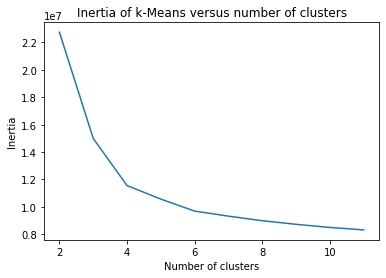

In [48]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2,12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**ANÁLISIS**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster  
- Tabla de contingencia: alguna categórica vs clusters para ver posible asociación


In [49]:
# Creamos una nueva variable categórica de la base recodificando la posición 
# para simplificar el análisis de los resultados de clustering

forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'FW'
    
    elif position in midfielders:
        return 'MF'
    
    elif position in defenders:
        return 'D'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [50]:
df_clusters["Position2"]=df_clusters["club_position"].apply(lambda x: pos2(x))
df_clusters["Position2"].value_counts()

nan    1806
D       915
FW      827
MF      759
GK      286
Name: Position2, dtype: int64

In [51]:
df_sk = df_clusters.groupby(['Position2','kmeans_4']).size()
df_sk

Position2  kmeans_4
D          0           389
           2             1
           3           525
FW         0           107
           2           715
           3             5
GK         1           286
MF         0           565
           2           143
           3            51
nan        0           664
           1           158
           2           630
           3           354
dtype: int64

In [52]:
df_aux = pd.DataFrame()
position = ['D','D','D','D','GK','GK','GK','GK','FW','FW','FW','FW','MF','MF','MF','MF']
kmeans = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
size = [389/(389+1+525),0,1/(389+1+525),525/(389+1+525),0,286/286,0,0,107/(107+715+5),0,715/(107+715+5),5/(107+715+5),143/(143+51+664),0,51/(143+51+664),664/(143+51+664)]
df_aux['Position2'] = position
df_aux['kmeans_4'] = kmeans
df_aux['Size'] = size
#df_aux

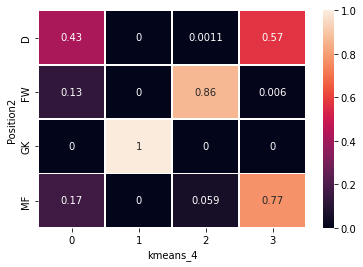

In [53]:
flights = df_aux.pivot('Position2','kmeans_4','Size')
ax = sns.heatmap(flights, annot=True, linewidths=.5)

kmean = 0 => Defensores

kmean = 1 => Arqueros

kmean = 2 => Delanteros

kmean = 3 => Mediocampistas

**IMPORTANTE.** quiero hacer un grafico tipo mapa de calor que cuente la cantidad de cada casos kmeans_4/Position2 

## 4.2-Clustering-con-Kmeans - DF de arqueros


In [54]:
# Número de clusters buscado
n_clust_arq = 2

km_arq = KMeans(n_clusters=n_clust_arq)
km_arq.fit(df_skills_arq) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters_arq = km_arq.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [55]:
df_clusters_arq=df_n_arq.copy()
df_clusters_arq['kmeans_5'] = km_arq.labels_ #clusters
print('Kmeans encontró: ', max(km_arq.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters_arq.head(4)

Kmeans encontró:  2 clusters, nosotros forzamos la cantidad


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,kmeans_5
5,200389,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,188,87,240.0,Atlético de Madrid,Spain Primera Division,1.0,GK,44,Slovenia,NaN,NaN,NaN,Right,3,1,5,238000000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0,33+3,33+3,33+3,32,35,35,35,32,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3,0
7,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,193,93,21.0,FC Bayern München,German 1. Bundesliga,1.0,GK,21,Germany,1337.0,GK,1.0,Right,4,1,5,22300000.0,NaN,NaN,NaN,NaN,NaN,NaN,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0,40+3,40+3,40+3,40,43,43,43,40,47+3,47+3,47+3,44+3,50+3,50+3,50+3,44+3,37+3,43+3,43+3,43+3,37+3,35+3,34+3,34+3,34+3,35+3,88+2,0
8,192448,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,187,85,241.0,FC Barcelona,Spain Primera Division,1.0,GK,21,Germany,NaN,NaN,NaN,Right,4,1,4,210400000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,14,11,61,14,21,18,12,63,30,38,50,39,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,43.0,35+3,35+3,35+3,35,38,38,38,35,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3,0
12,192119,T. Courtois,Thibaut Courtois,GK,89,91,85500000.0,250000.0,29,199,96,243.0,Real Madrid CF,Spain Primera Division,1.0,GK,7,Belgium,1325.0,GK,1.0,Left,3,1,4,181700000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,62,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,74,86,88,46.0,31+3,31+3,31+3,29,31,31,31,29,32+3,32+3,32+3,31+3,32+3,32+3,32+3,31+3,29+3,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,86+3,0


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [56]:
bool_crack=df_n_arq["overall"] > 85
bool_no_crack=df_n_arq["overall"] < 86

#Eligo dos números entre 0 y de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [57]:
kmean_clusters_arq = go.Scatter(x=df_skills_arq[skill_1], y=df_skills_arq[skill_2],
                           mode='markers',
                           text=df_n_arq.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_arq.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_arq.loc[bool_crack,skill_1], y=df_skills_arq.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n_arq.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters_arq,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [58]:
#En Colab:
fig.show(renderer="colab")

In [59]:
#En Jupyter:
#iplot(fig)
#plot(fig)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

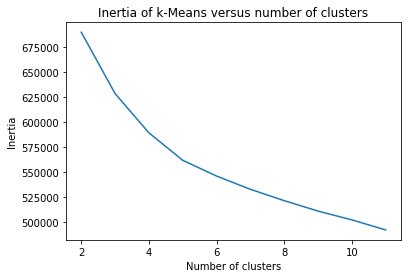

In [60]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores_arq = [KMeans(n_clusters=i).fit(df_skills_arq).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores_arq)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

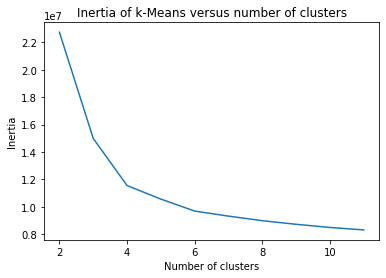

In [61]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

## 4.3-Clustering-con-Kmeans - DF de jugadores de campo



In [63]:
skills_ratings_cam = ['attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle']
df_skills_cam=df_n_cam[skills_ratings_cam]

In [64]:
# Número de clusters buscado
n_clust_cam = 5
km_cam = KMeans(n_clusters=n_clust_cam).fit(df_skills_cam) # utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters_cam = km_cam.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  11553599.174627902


In [65]:
df_clusters_cam=df_n_cam.copy()
df_clusters_cam['kmeans_5'] = km_cam.labels_ #clusters
print('Kmeans encontró: ', max(km_cam.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters_cam.tail(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,kmeans_5
4589,262411,Miguel Crespo,Miguel Crespo da Silva,CM,71,76,2800000.0,24000.0,24,183,78,326.0,Fenerbahçe SK,Turkish Süper Lig,1.0,SUB,38,Portugal,NaN,NaN,NaN,Right,3,2,1,5500000.0,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8,NaN,67+2,67+2,67+2,69,69,69,69,69,70+2,70+2,70+2,70+2,71+2,71+2,71+2,70+2,70+2,72+2,72+2,72+2,70+2,70+2,70+2,70+2,70+2,70+2,17+2,2
4590,262815,G. Kotsiras,Giannis Kotsiras,"RB, RM",71,71,1700000.0,600.0,28,183,77,1884.0,Panathinaikos FC,Greek Super League,1.0,RB,22,Greece,NaN,NaN,NaN,Right,4,2,1,3700000.0,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,NaN,62+2,62+2,62+2,68,65,65,65,68,66+2,66+2,66+2,69+2,66+2,66+2,66+2,69+2,70+1,67+2,67+2,67+2,70+1,69+2,65+2,65+2,65+2,69+2,17+2,4
4591,263230,M. Osmajić,Milutin Osmajić,"ST, LM, RM",71,81,4200000.0,15000.0,21,185,76,1968.0,Cádiz CF,Spain Primera Division,1.0,SUB,15,Montenegro,NaN,NaN,NaN,Right,5,3,1,10100000.0,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,NaN,71+2,71+2,71+2,68,69,69,69,68,66+2,66+2,66+2,67+2,61+2,61+2,61+2,67+2,54+2,52+2,52+2,52+2,54+2,53+2,51+2,51+2,51+2,53+2,19+2,1
4592,263383,S. Lončar,Stjepan Lončar,"CDM, CAM",71,79,3900000.0,550.0,24,187,74,1874.0,Ferencvárosi TC,Hungarian Nemzeti Bajnokság I,1.0,SUB,8,Bosnia and Herzegovina,NaN,NaN,NaN,Left,3,2,1,9400000.0,61.0,62.0,67.0,71.0,65.0,73.0,57,61,54,70,61,71,60,49,74,78,59,62,53,71,55,62,61,78,72,66,72,66,68,71,48,74,64,70,61,13,10,10,6,9,NaN,66+2,66+2,66+2,67,68,68,68,67,70+2,70+2,70+2,69+2,72+2,72+2,72+2,69+2,67+2,70+2,70+2,70+2,67+2,66+2,66+2,66+2,66+2,66+2,16+2,4


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [66]:
bool_crack=df_n_cam["overall"] > 85
bool_no_crack=df_n_cam["overall"] < 86

#Eligo dos números entre 0 y de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [67]:
kmean_clusters_cam = go.Scatter(x=df_skills_cam[skill_1], y=df_skills_cam[skill_2],
                           mode='markers',
                           text=df_n_cam.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters_cam.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_cam.loc[bool_crack,skill_1], y=df_skills_cam.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n_cam.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters_cam,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=650,height=650)

fig = go.Figure(data=data, layout=layout)

In [68]:
#En Colab:
fig.show(renderer="colab")

In [69]:
#En Jupyter:
#iplot(fig)
#plot(fig)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

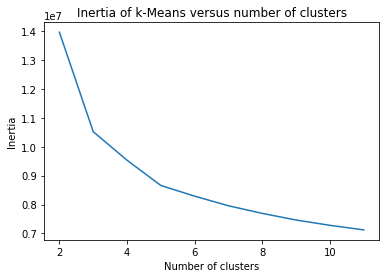

In [70]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores_cam = [KMeans(n_clusters=i).fit(df_skills_cam).inertia_ for i in range(2,12)]

plt.plot(np.arange(2,12), scores_cam)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# 5.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Ejercicio: Probar con varios)

## 5.1-Clustering-con-Mean-Shifts - DF completo

In [71]:
ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4593


Graficamos los resultados:

In [72]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[24]

In [73]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [74]:
#En Colab
fig.show(renderer="colab")

In [75]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4593 clusters, según los hiperparámetros elegidos


**EVALUACIÓN, ANÁLISIS: Análisis exploratorio de los clusters, usando las clases/clusters asignadas por MeanShift** 

## 5.2-Clustering-con-Mean-Shifts - DF de arqueros

In [76]:
ms_arq = MeanShift(bandwidth=2, bin_seeding=True)

ms_arq.fit(df_skills_arq)

clusters2 = ms_arq.labels_
cluster_centers = ms_arq.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 444


Graficamos los resultados:

In [77]:
bool_crack=df_n_arq["overall"] > 85
bool_no_crack=df_n_arq["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[24]

In [78]:
data=[]
MeanShift_clusters_arq = go.Scatter(x=df_skills_arq[skill_1], y=df_skills_arq[skill_2],
                           mode='markers',
                        text=df_n_arq.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_arq.loc[bool_crack,skill_1], y=df_skills_arq.loc[bool_crack,skill_2],name='Top players',
                      text=df_n_arq.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters_arq,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [79]:
#En Colab
fig.show(renderer="colab")

In [80]:
df_clusters_arq['MeanShift'] = ms_arq.labels_ #clusters2
print('Kmeans encontró: ', max(km_arq.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms_arq.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  2 clusters, nosotros lo forzamos
Mean shift encontró  444 clusters, según los hiperparámetros elegidos


**EVALUACIÓN, ANÁLISIS: Análisis exploratorio de los clusters, usando las clases/clusters asignadas por MeanShift** 

## 5.3-Clustering-con-Mean-Shifts - DF de jugadores de campo

In [118]:
ms_cam = MeanShift(bandwidth=80, bin_seeding=True)

ms_cam.fit(df_skills_cam)

clusters2 = ms_cam.labels_
cluster_centers = ms_cam.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 1


Graficamos los resultados:

In [119]:
bool_crack=df_n_cam["overall"] > 85
bool_no_crack=df_n_cam["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [120]:
data=[]
MeanShift_clusters_cam = go.Scatter(x=df_skills_cam[skill_1], y=df_skills_cam[skill_2],
                           mode='markers',
                        text=df_n_cam.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_cam.loc[bool_crack,skill_1], y=df_skills_cam.loc[bool_crack,skill_2],name='Top players',
                      text=df_n_cam.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters_cam,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [121]:
#En Colab
fig.show(renderer="colab")

In [85]:
df_clusters_cam['MeanShift'] = ms_cam.labels_ #clusters2
print('Kmeans encontró: ', max(km_cam.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms_cam.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  4149 clusters, según los hiperparámetros elegidos


In [86]:
#Cantidad de observaciones por Cluster
#Análisis descriptivo separando por Cluster
#Tabla de contingencia alguna categórica vs clusters
#Tabla de contingencia kmeans vs meanshift...
#otras ideas?


**Pregunta: normalizamos/estandarizamos la base?**

**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

# 6.-Clustering-DBSCAN

## 6.1-Clustering-con-DBSCAN: - DF completo

In [124]:
db = DBSCAN(eps=60,min_samples=10)

db.fit(df_skills)

clusters3 = db.labels_
cluster_centers = db.components_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por DBSCAN : %d" % n_clusters_)

Cantidad de clusters encontrados por DBSCAN : 18


In [144]:
db = DBSCAN(eps=80,min_samples=15).fit(df_skills)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
clusters3 = db.labels_

# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(clusters3)) - (1 if -1 in clusters3 else 0)
n_clusters_ = len(np.unique(clusters3))
n_noise_ = list(clusters3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 8


Graficamos los resultados:

In [145]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [146]:
data=[]
DBSCAN_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[DBSCAN_clusters,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [147]:
#En Colab
fig.show(renderer="colab")

## 6.2-Clustering-con-DBSCAN: - DF de arqueros

In [92]:
db_arq = DBSCAN(eps=20,min_samples=2)

db_arq.fit(df_skills_arq)

clusters3 = db_arq.labels_
cluster_centers = db_arq.components_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por DBSCAN : %d" % n_clusters_)

Cantidad de clusters encontrados por DBSCAN : 3


In [93]:
db_arq = DBSCAN(eps=40.0,min_samples=5).fit(df_skills_arq)

core_samples_mask = np.zeros_like(db_arq.labels_, dtype=bool)
core_samples_mask[db_arq.core_sample_indices_] = True
clusters3 = db_arq.labels_

# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(clusters3)) - (1 if -1 in clusters3 else 0)
n_clusters_ = len(np.unique(clusters3))
n_noise_ = list(clusters3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 37


Graficamos los resultados:

In [94]:
bool_crack=df_n_arq["overall"] > 85
bool_no_crack=df_n_arq["overall"] < 86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[24]

In [95]:
data=[]
DBSCAN_clusters_arq = go.Scatter(x=df_skills_arq[skill_1], y=df_skills_arq[skill_2],
                           mode='markers',
                        text=df_n_arq.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_arq.loc[bool_crack,skill_1], y=df_skills_arq.loc[bool_crack,skill_2],name='Top players',
                      text=df_n_arq.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[DBSCAN_clusters_arq,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [96]:
#En Colab
fig.show(renderer="colab")

In [97]:
df_clusters_arq['MeanShift'] = ms_arq.labels_ #clusters2
print('Kmeans encontró: ', max(km_arq.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms_arq.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  2 clusters, nosotros lo forzamos
Mean shift encontró  444 clusters, según los hiperparámetros elegidos


## 6.3-Clustering-con-DBSCAN - DF de jugadores de campo

In [98]:
db_cam = DBSCAN(eps=20,min_samples=2)

db_cam.fit(df_skills_cam)

clusters3 = db_cam.labels_
cluster_centers = db_cam.components_

labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por DBSCAN : %d" % n_clusters_)

Cantidad de clusters encontrados por DBSCAN : 26


In [99]:
db_cam = DBSCAN(eps=30,min_samples=5).fit(df_skills_cam)

core_samples_mask = np.zeros_like(db_cam.labels_, dtype=bool)
core_samples_mask[db_cam.core_sample_indices_] = True
clusters3 = db_cam.labels_

# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(clusters3)) - (1 if -1 in clusters3 else 0)
n_clusters_ = len(np.unique(clusters3))
n_noise_ = list(clusters3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11
Estimated number of noise points: 2583


In [100]:
bool_crack=df_n_cam["overall"] > 85
bool_no_crack=df_n_cam["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[27]

In [101]:
data=[]
DBSCAN_clusters_cam = go.Scatter(x=df_skills_cam[skill_1], y=df_skills_cam[skill_2],
                           mode='markers',
                        text=df_n_cam.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_cam.loc[bool_crack,skill_1], y=df_skills_cam.loc[bool_crack,skill_2],name='Top players',
                      text=df_n_cam.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[DBSCAN_clusters_cam,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [102]:
#En Colab
fig.show(renderer="colab")

In [103]:
df_clusters_cam['MeanShift'] = ms_cam.labels_ #clusters2
print('Kmeans encontró: ', max(km_cam.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms_cam.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  4149 clusters, según los hiperparámetros elegidos


In [104]:
n=10000
df_n=df.loc[:n]
df_n=df_n[(df_n["club_position"]!='GK')&(df_n['overall']>70)]

skills_ratings = ['attacking_crossing','attacking_finishing',
       'attacking_heading_accuracy','attacking_short_passing',
       'attacking_volleys','skill_dribbling',
       'skill_curve','skill_fk_accuracy','skill_long_passing',
       'skill_ball_control','movement_acceleration','movement_sprint_speed',
       'movement_agility','movement_reactions','movement_balance',
       'power_shot_power','power_jumping','power_stamina','power_strength',
       'power_long_shots','mentality_aggression','mentality_interceptions',
       'mentality_positioning','mentality_vision','mentality_penalties',
       'mentality_composure','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle']

df_skills=df_n[skills_ratings]


In [105]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_

In [106]:
#data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[26]
skill_2=skills_ratings[2]

In [107]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [108]:
#En Colab
fig.show(renderer="colab")

In [109]:
#en Jupyter:
plot(fig)

'temp-plot.html'

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [110]:
ms = MeanShift(bandwidth=2.01, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 4307


In [111]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[26]
skill_2=skills_ratings[2]
print(skill_1,skill_2)

defending_marking_awareness attacking_heading_accuracy


In [112]:
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [113]:
#En Colab
fig.show(renderer="colab")

In [114]:
#En Jupyter
iplot(fig)

In [115]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [116]:
df_clusters.head(5)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,kmeans,MeanShift
0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,1,32
1,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,1,1192
2,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,1,15
3,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,1,35
4,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,3,0


**Análisis exploratorio de las clases**